In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from Twitter_bot_detection_713.data_prep import tweet_df_cleaner, user_df_cleaner, get_final_tweet_data

In [2]:
user_df = pd.read_csv('../raw_data/users_data.csv',
                          sep='\t',
                          lineterminator='\n')

In [3]:
df = user_df_cleaner(user_df)

In [4]:
df

,author_id,username,user_display_name,user_desc,user_created_at,user_verified,user_private,user_followers_cnt,user_following_cnt,user_tweet_count,user_list_count,target
0,787405734442958848,best_in_dumbest,The Best In Dumbest,"Blame @xaiax, Inspired by @MakingInvisible, us...",2016-10-15 21:32:11+00:00,False,False,1848,5,14542,0,bot
1,796216118331310080,CJRubinPhoto,CJ Rubin,Photographing the American West since 1980. I ...,2016-11-09 05:01:30+00:00,False,False,812,845,251,5,human
2,875949740503859204,SVGEGENT,🔥𝖙𝖍𝖊 𝖘𝖆𝖛𝖆𝖌𝖊 𝖌𝖊𝖓𝖙𝖑𝖊𝖒𝖆𝖓🔥,Part savage all gentleman ...,2017-06-17 05:34:27+00:00,False,False,182,885,1288,2,human
3,756119643622735875,TinkerVHECHK5,Danielle Tinker,Wife.Godmother.Friend.Feline Fanatic! Principa...,2016-07-21 13:32:25+00:00,False,False,657,747,1920,2,human
4,464781334,JoleonLescott,Joleon Lescott,England U21 Assistant Coach | @pumafootball Am...,2012-01-15 16:32:35+00:00,True,False,739915,120,4459,1800,human
...,...,...,...,...,...,...,...,...,...,...,...,...
36229,63963107,butchsekab,Rosemary Pearman nee Bakes,"Unemployed! Retail Assistant, Stocktaker, Dry ...",2009-08-08 13:11:15+00:00,False,False,152,1219,487,3,human
36230,1064042478,Mathieu_Era,Tyrann Mathieu,FOLLOW ME ON IG.,2013-01-05 21:35:37+00:00,True,False,1237990,799,27326,1475,human
36231,1089732602,SDalmaoficial,Sergio Dalma,Bienvenid@s al Twitter Oficial de Sergio Dalma...,2013-01-14 18:05:54+00:00,True,False,85615,189,6640,270,human
36232,815529979,VinceYearly,Mr. Vance,Just a good guy wrapped up in a bad system.\nA...,2012-09-10 16:12:02+00:00,False,False,137,166,1040,3,human


In [5]:
df[['user_followers_cnt', 'user_following_cnt', 'user_tweet_count', 'user_list_count']].describe()

,user_followers_cnt,user_following_cnt,user_tweet_count,user_list_count
count,3.623400e+04,3.623400e+04,3.623400e+04,3.623400e+04
mean,3.886090e+05,4.183601e+03,2.265330e+04,9.210796e+02
std,2.563603e+06,4.746575e+04,7.301241e+04,1.722154e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.500000e+01,3.100000e+01,1.365250e+03,0.000000e+00
50%,3.720000e+02,2.990000e+02,4.453500e+03,3.000000e+00
75%,9.733500e+03,9.240000e+02,1.829875e+04,1.060000e+02
max,1.302211e+08,4.175930e+06,2.775982e+06,3.104381e+06


In [6]:
df.corr()

,author_id,user_verified,user_private,user_followers_cnt,user_following_cnt,user_tweet_count,user_list_count
author_id,1.000000,-0.190439,-0.020886,-0.060127,-0.028258,-0.080968,-0.021223
user_verified,-0.190439,1.000000,-0.097733,0.272780,0.055422,0.085715,0.095118
user_private,-0.020886,-0.097733,1.000000,-0.030872,-0.012360,-0.010292,-0.010710
user_followers_cnt,-0.060127,0.272780,-0.030872,1.000000,0.049412,0.035157,0.245892
user_following_cnt,-0.028258,0.055422,-0.012360,0.049412,1.000000,0.073782,0.018818
user_tweet_count,-0.080968,0.085715,-0.010292,0.035157,0.073782,1.000000,0.024108
user_list_count,-0.021223,0.095118,-0.010710,0.245892,0.018818,0.024108,1.000000


## Duplicates & Missing Values

In [7]:
df.duplicated().sum()

0

NO DUPLICATES

In [8]:
(df.isnull().sum() / len(df)) 

author_id             0.000000
username              0.000000
user_display_name     0.000248
user_desc             0.196197
user_created_at       0.000000
user_verified         0.000000
user_private          0.000000
user_followers_cnt    0.000000
user_following_cnt    0.000000
user_tweet_count      0.000000
user_list_count       0.000000
target                0.000000
dtype: float64

### Imputing missing values

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imputer = SimpleImputer(strategy='constant', fill_value='no user_desc')

imputer.fit(df[['user_desc']])

df['user_desc'] = imputer.transform(df[['user_desc']])

In [11]:
(df.isnull().sum() / len(df)) * 100

author_id             0.000000
username              0.000000
user_display_name     0.024839
user_desc             0.000000
user_created_at       0.000000
user_verified         0.000000
user_private          0.000000
user_followers_cnt    0.000000
user_following_cnt    0.000000
user_tweet_count      0.000000
user_list_count       0.000000
target                0.000000
dtype: float64

## Outliers - Plotting

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='user_followers_cnt'>

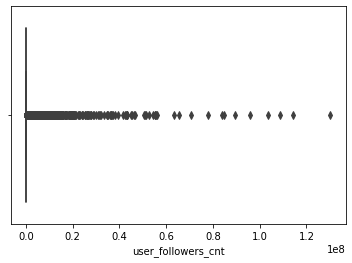

In [13]:
sns.boxplot(data=df, x='user_followers_cnt')

(0.0, 10000.0)

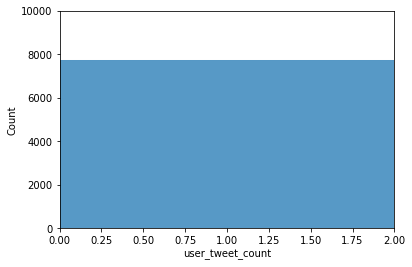

In [14]:
sns.histplot(data=df, x='user_tweet_count')
plt.xlim(0,2)
plt.ylim(0,10000)

## Robust-Scaler for num_vars

In [15]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()

num_features = df[['user_followers_cnt', 'user_following_cnt', 'user_tweet_count', 'user_list_count']]

r_scaler.fit(num_features)
df[['user_followers_cnt', 'user_following_cnt', 'user_tweet_count', 'user_list_count']] = r_scaler.transform(num_features)

In [16]:
df.head()

,author_id,username,user_display_name,user_desc,user_created_at,user_verified,user_private,user_followers_cnt,user_following_cnt,user_tweet_count,user_list_count,target
0,787405734442958848,best_in_dumbest,The Best In Dumbest,"Blame @xaiax, Inspired by @MakingInvisible, us...",2016-10-15 21:32:11+00:00,False,False,0.152188,-0.329227,0.595772,-0.028302,bot
1,796216118331310080,CJRubinPhoto,CJ Rubin,Photographing the American West since 1980. I ...,2016-11-09 05:01:30+00:00,False,False,0.045368,0.611422,-0.248177,0.018868,human
2,875949740503859204,SVGEGENT,🔥𝖙𝖍𝖊 𝖘𝖆𝖛𝖆𝖌𝖊 𝖌𝖊𝖓𝖙𝖑𝖊𝖒𝖆𝖓🔥,Part savage all gentleman ...,2017-06-17 05:34:27+00:00,False,False,-0.019591,0.656215,-0.186937,-0.009434,human
3,756119643622735875,TinkerVHECHK5,Danielle Tinker,Wife.Godmother.Friend.Feline Fanatic! Principa...,2016-07-21 13:32:25+00:00,False,False,0.029386,0.501680,-0.149615,-0.009434,human
4,464781334,JoleonLescott,Joleon Lescott,England U21 Assistant Coach | @pumafootball Am...,2012-01-15 16:32:35+00:00,True,False,76.253338,-0.200448,0.000325,16.952830,human


## Labeling 'bool' and target 

In [17]:
df['user_private'].value_counts()

False    34707
True      1527
Name: user_private, dtype: int64

In [18]:
df['user_verified'] = df['user_verified'].map(lambda x: 1 if x == True else 0)

In [19]:
df['user_private'] = df['user_private'].map(lambda x: 1 if x == True else 0)

In [20]:
df['target'] = df['target'].map(lambda x: 1 if x == 'bot' else 0)

In [22]:
df.head()

,author_id,username,user_display_name,user_desc,user_created_at,user_verified,user_private,user_followers_cnt,user_following_cnt,user_tweet_count,user_list_count,target
0,787405734442958848,best_in_dumbest,The Best In Dumbest,"Blame @xaiax, Inspired by @MakingInvisible, us...",2016-10-15 21:32:11+00:00,0,0,0.152188,-0.329227,0.595772,-0.028302,1
1,796216118331310080,CJRubinPhoto,CJ Rubin,Photographing the American West since 1980. I ...,2016-11-09 05:01:30+00:00,0,0,0.045368,0.611422,-0.248177,0.018868,0
2,875949740503859204,SVGEGENT,🔥𝖙𝖍𝖊 𝖘𝖆𝖛𝖆𝖌𝖊 𝖌𝖊𝖓𝖙𝖑𝖊𝖒𝖆𝖓🔥,Part savage all gentleman ...,2017-06-17 05:34:27+00:00,0,0,-0.019591,0.656215,-0.186937,-0.009434,0
3,756119643622735875,TinkerVHECHK5,Danielle Tinker,Wife.Godmother.Friend.Feline Fanatic! Principa...,2016-07-21 13:32:25+00:00,0,0,0.029386,0.501680,-0.149615,-0.009434,0
4,464781334,JoleonLescott,Joleon Lescott,England U21 Assistant Coach | @pumafootball Am...,2012-01-15 16:32:35+00:00,1,0,76.253338,-0.200448,0.000325,16.952830,0


## Correlation & Heatmap

In [23]:
df[['user_verified', 'user_private', 'user_followers_cnt', 'user_following_cnt', 'user_tweet_count', 'user_list_count']].corr()

,user_verified,user_private,user_followers_cnt,user_following_cnt,user_tweet_count,user_list_count
user_verified,1.000000,-0.097733,0.272780,0.055422,0.085715,0.095118
user_private,-0.097733,1.000000,-0.030872,-0.012360,-0.010292,-0.010710
user_followers_cnt,0.272780,-0.030872,1.000000,0.049412,0.035157,0.245892
user_following_cnt,0.055422,-0.012360,0.049412,1.000000,0.073782,0.018818
user_tweet_count,0.085715,-0.010292,0.035157,0.073782,1.000000,0.024108
user_list_count,0.095118,-0.010710,0.245892,0.018818,0.024108,1.000000


<AxesSubplot:>

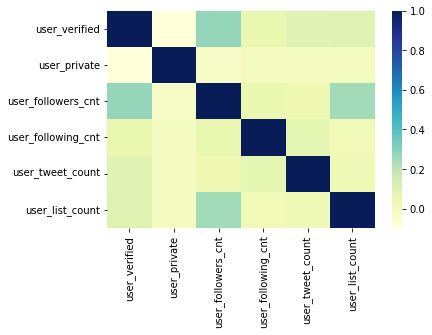

In [24]:
corr = df[['user_verified', 'user_private', 'user_followers_cnt', 'user_following_cnt', 'user_tweet_count', 'user_list_count']].corr()
sns.heatmap(corr, cmap="YlGnBu")